In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from statsmodels.base.model import GenericLikelihoodModel
import seaborn as sns
sns.set_palette("muted")
sns.set_color_codes()
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
sns.set_style({"axes.grid": "True", "grid.color": "0.95"})

plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.dpi"] = 100

In [49]:
import matplotlib as mpl
def darken_color(color, p):
    return (color[0]*p,color[1]*p,color[2]*p)

colors = sns.color_palette("muted") + [(.1, .1, .1)]
for code, color in zip(["bd","gd","rd","md","yd","cd","kd"], colors):
    rgb = mpl.colors.colorConverter.to_rgb(darken_color(color,0.8))
    mpl.colors.colorConverter.colors[code] = rgb
    mpl.colors.colorConverter.cache[code] = rgb

Prepare variable list for reading the result files. `time_dependent` needs to be changed to `False` for time-independent results.

In [50]:
from collections import OrderedDict 

In [51]:
time_dependent = True

var_types = ("gen", "fit", "err")
var_dict_ti = OrderedDict([
            ("ap", r"$|a_\parallel|$"), 
            ("apa", r"$\arg(a_\parallel)$"), 
            ("a0", r"$|a_0|$"), 
            ("a0a", r"$\arg(a_0)$"), 
            ("at", r"$|a_\perp|$"), 
            ("ata", r"$\arg(a_\perp)$")
            ])

var_dict_td = OrderedDict([
            ("ap", r"$|a_\parallel|$"), 
            ("apa", r"$\arg(a_\parallel)$"), 
            ("a0", r"$|a_0|$"), 
            ("a0a", r"$\arg(a_0)$"), 
            ("at", r"$|a_\perp|$"), 
            ("ata", r"$\arg(a_\perp)$"),
            ("xp", r"$x_\parallel$"),
            ("x0", r"$x_0$"),
            ("xt", r"$x_\perp$"),
            ("yp", r"$y_\parallel$"),
            ("y0", r"$y_0$"),
            ("yt", r"$y_\perp$"),
            ("xbp", r"$\bar x_\parallel$"),
            ("xb0", r"$\bar x_0$"),
            ("xbt", r"$\bar x_\perp$"),
            ("ybp", r"$\bar y_\parallel$"),
            ("yb0", r"$\bar y_0$"),
            ("ybt", r"$\bar y_\perp$")
            ])

var_dict = {}
if time_dependent:
    var_dict = var_dict_td
else:
    var_dict = var_dict_ti

var_names = list(var_dict.keys())
vars = ([var_name + "_" + var_type for var_name in var_names for var_type in var_types])

In [52]:
import os
import glob

dirs_ti = [
    '../results/Kpi_ti_CR',
    '../results/Kpipi0_ti_CR',
    '../results/K3pi_ti_CR',
    '../results/Kpi-Kpipi0-K3pi_ti_CR',
    '../results/Kpi_ti_CRSCF',
    '../results/Kpipi0_ti_CRSCF',
    '../results/K3pi_ti_CRSCF',
    '../results/Kpi-Kpipi0-K3pi_ti_CRSCF',
    '../results/Kpi_ti_all',
    '../results/Kpipi0_ti_all',
    '../results/K3pi_ti_all',
    '../results/Kpi-Kpipi0-K3pi_ti_all'
]

dirs_td = [
    '../results/Kpi_td_CR',
    '../results/Kpipi0_td_CR',
    '../results/K3pi_td_CR',
    '../results/Kpi-Kpipi0-K3pi_td_CR',
    '../results/Kpi_td_CRSCF',
    '../results/Kpipi0_td_CRSCF',
    '../results/K3pi_td_CRSCF',
    '../results/Kpi-Kpipi0-K3pi_td_CRSCF',
    '../results/Kpi_td_all',
    '../results/Kpipi0_td_all',
    '../results/K3pi_td_all',
    '../results/Kpi-Kpipi0-K3pi_td_all'
]

dirs
if (time_dependent):
    dirs = dirs_td
else:
    dirs = dirs_ti

dfs = []
for directory in dirs:
    all_files = glob.glob(os.path.join(directory, "stream[0-6]"))
    print("Num files in '" + str(directory) + "': " + str(len(all_files)))
    df_from_each_file = (pd.read_csv(f, sep=" \|\| | \| | ", header=None, names=vars, engine='python') for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    dfs.append(df)

Num files in '../results/Kpi_td_CR': 6
Num files in '../results/Kpipi0_td_CR': 6
Num files in '../results/K3pi_td_CR': 6
Num files in '../results/Kpi-Kpipi0-K3pi_td_CR': 6
Num files in '../results/Kpi_td_CRSCF': 6
Num files in '../results/Kpipi0_td_CRSCF': 6
Num files in '../results/K3pi_td_CRSCF': 6
Num files in '../results/Kpi-Kpipi0-K3pi_td_CRSCF': 6
Num files in '../results/Kpi_td_all': 6
Num files in '../results/Kpipi0_td_all': 6
Num files in '../results/K3pi_td_all': 6
Num files in '../results/Kpi-Kpipi0-K3pi_td_all': 6


Calculate the pulls and display their means and then standard deviations.

In [53]:
dfs_pulls = []
for i in range(0, len(dirs)):
    df = dfs[i]
    df_pulls_dict = {var : (df[var + "_fit"] - df[var + "_gen"])/df[var + "_err"] for var in var_names}
    df_pulls = pd.DataFrame(df_pulls_dict)
    dfs_pulls.append(df_pulls)

In [54]:
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i in range(0, len(dirs)):
        print("{:+5.2f} | ".format(dfs_pulls[i].mean()[var]), end='')
    print()

ap  | -0.68 | -0.20 | -0.20 | -0.60 | -1.19 | -0.86 | -0.75 | +0.05 | -0.25 | +1.02 | +0.76 | +1.55 | 
apa | -0.53 | -0.71 | -0.14 | -0.70 | -0.18 | +0.25 | +0.59 | +1.47 | +0.06 | -1.12 | +0.28 | -3.47 | 
a0  | +0.69 | +0.43 | +0.64 | +0.81 | +0.83 | +0.16 | +0.84 | -2.58 | -1.14 | -2.06 | -1.28 | +0.47 | 
a0a |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan | 
at  | -0.12 | -0.35 | -0.63 | -0.41 | +0.29 | +0.73 | -0.26 | +3.43 | +1.75 | +1.40 | +0.74 | -2.22 | 
ata | -0.28 | -0.92 | +0.07 | -0.47 | -0.11 | -0.72 | +0.19 | +0.08 | +0.46 | -0.12 | +0.57 | -2.40 | 
xp  | +0.07 | -1.08 | -0.57 | -0.67 | -0.05 | -0.05 | -0.18 | -0.66 | +1.14 | -0.31 | -0.82 | -0.28 | 
x0  | +0.68 | -1.52 | -0.59 | -1.45 | +0.04 | -0.09 | +0.41 | -0.15 | -0.41 | -0.11 | +0.19 | -0.16 | 
xt  | -0.08 | -1.00 | -0.26 | -1.01 | -0.17 | -0.11 | +0.07 | -0.36 | -0.18 | -0.03 | +0.16 | -0.16 | 
yp  | +0.08 | +0.47 | -0.34 | +0.16 | +0.13 | +0.31 | -0.08 | -0.11 | +0.

In [55]:
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i in range(0, len(dirs)):
        print("{:+5.2f} | ".format(dfs_pulls[i].std()[var]), end='')
    print()

ap  | +0.67 | +0.64 | +0.96 | +0.69 | +0.65 | +0.92 | +1.14 | +1.06 | +0.57 | +1.24 | +1.65 | +1.02 | 
apa | +1.23 | +1.03 | +1.11 | +1.46 | +1.09 | +1.07 | +0.81 | +1.29 | +1.26 | +1.06 | +0.95 | +1.14 | 
a0  | +0.73 | +1.22 | +0.63 | +0.46 | +0.70 | +0.91 | +0.68 | +0.70 | +0.98 | +0.78 | +1.17 | +0.98 | 
a0a |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan |  +nan | 
at  | +1.18 | +1.44 | +0.87 | +0.67 | +1.27 | +1.25 | +0.86 | +0.66 | +1.35 | +0.68 | +1.28 | +0.84 | 
ata | +1.48 | +0.67 | +1.24 | +1.25 | +1.47 | +0.83 | +1.34 | +1.05 | +1.00 | +0.35 | +1.27 | +1.17 | 
xp  | +1.31 | +1.58 | +1.82 | +2.66 | +1.64 | +1.77 | +2.17 | +3.02 | +1.51 | +0.76 | +1.07 | +0.46 | 
x0  | +1.58 | +1.63 | +1.70 | +3.32 | +1.01 | +0.68 | +0.67 | +0.29 | +0.84 | +0.10 | +0.45 | +0.19 | 
xt  | +0.94 | +0.49 | +1.18 | +1.12 | +0.86 | +0.89 | +1.40 | +0.87 | +1.23 | +0.62 | +1.69 | +0.74 | 
yp  | +0.96 | +1.33 | +0.44 | +1.45 | +1.11 | +1.59 | +0.48 | +2.35 | +0.

The following cell shows a distribution of pulls for all directories and all variables

Plots for dir Kpi_td_CR


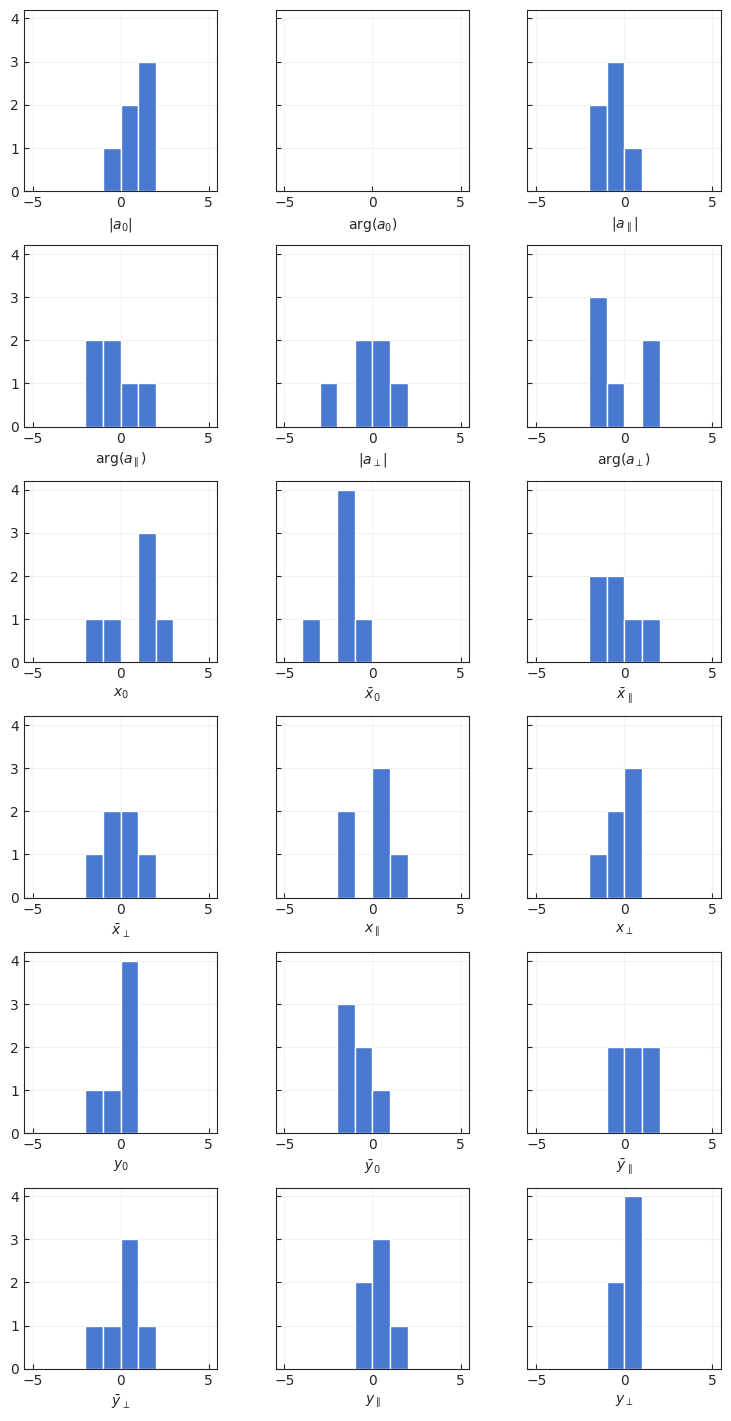

Plots for dir Kpipi0_td_CR


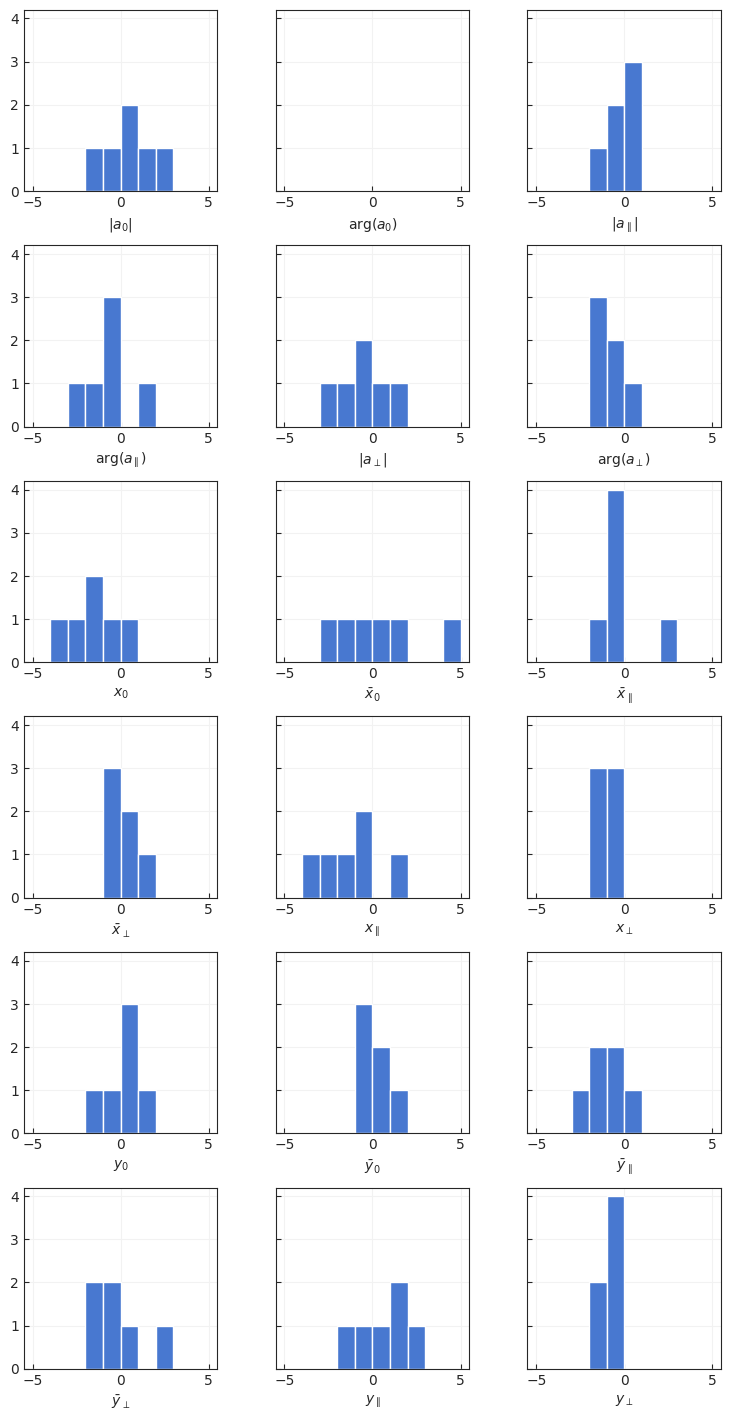

Plots for dir K3pi_td_CR


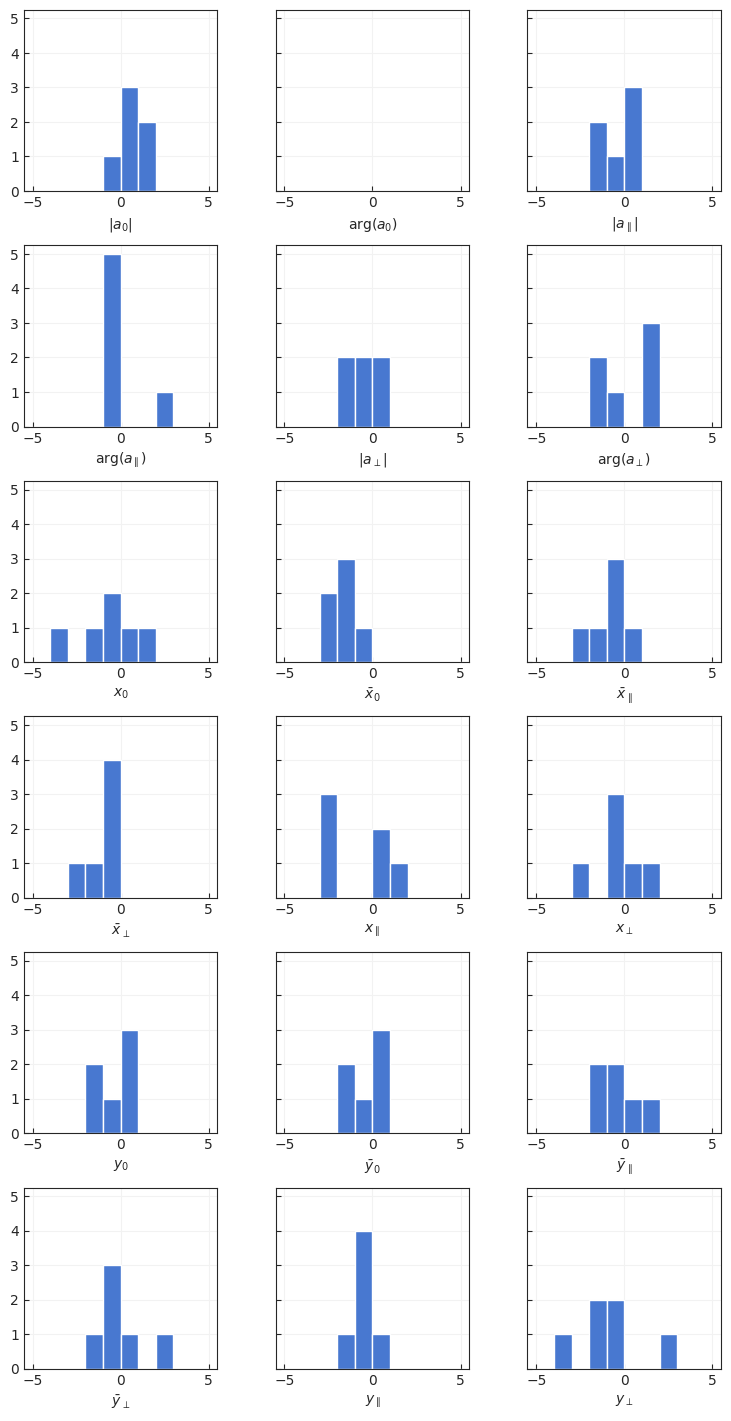

Plots for dir Kpi-Kpipi0-K3pi_td_CR


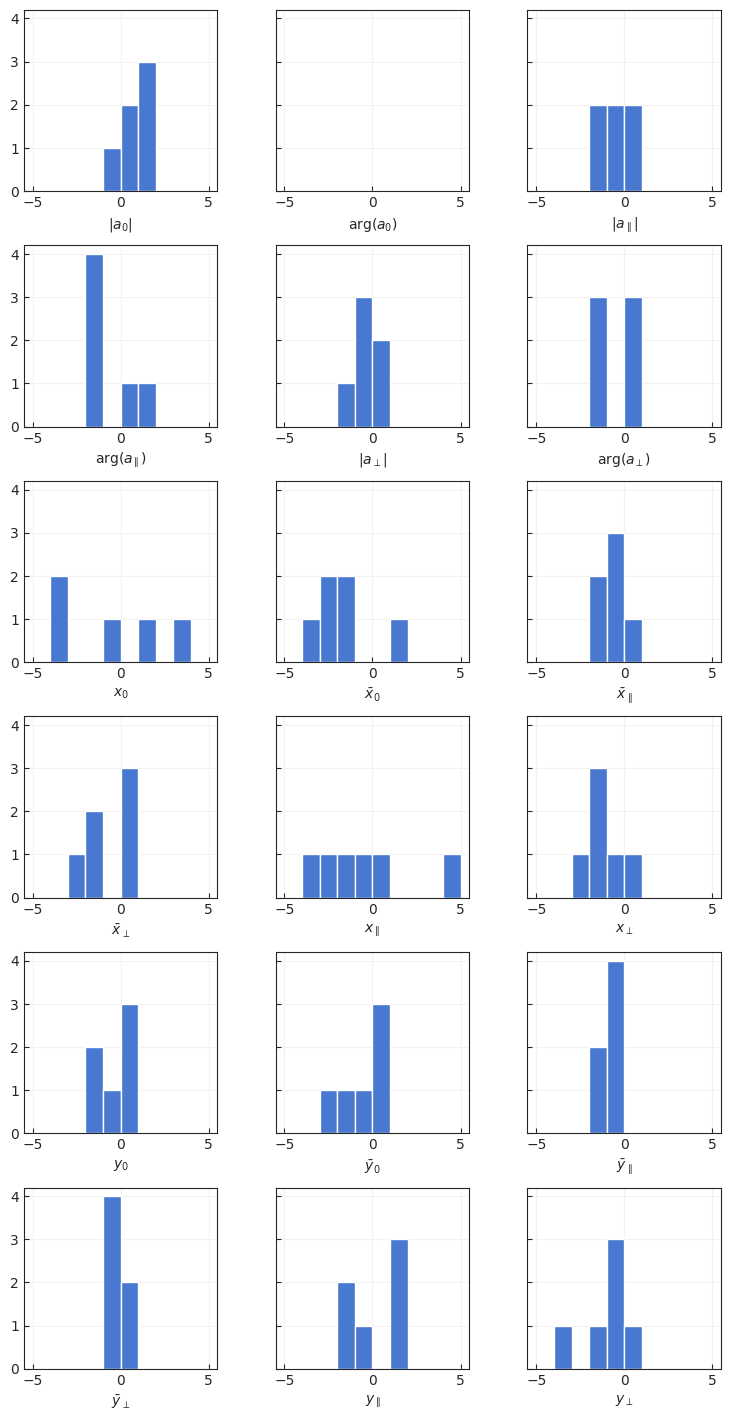

Plots for dir Kpi_td_CRSCF


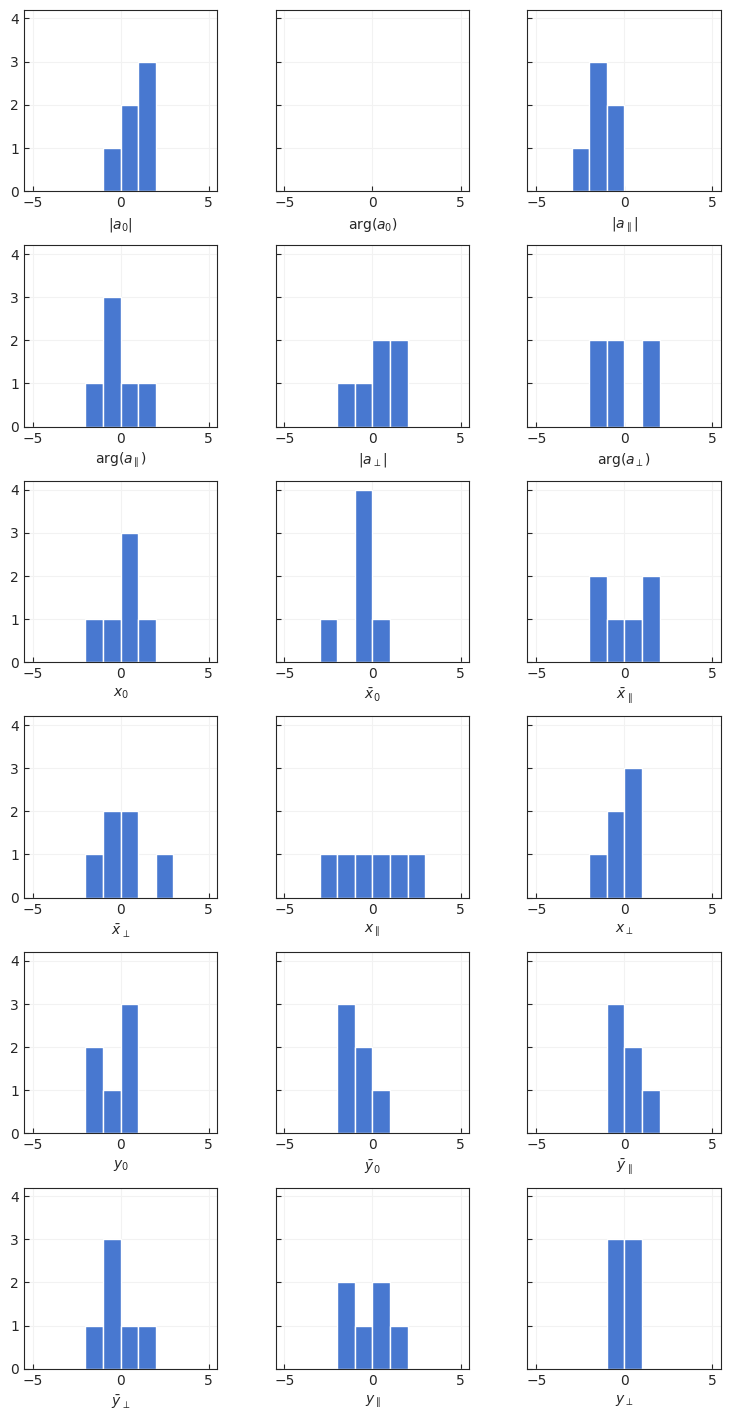

Plots for dir Kpipi0_td_CRSCF


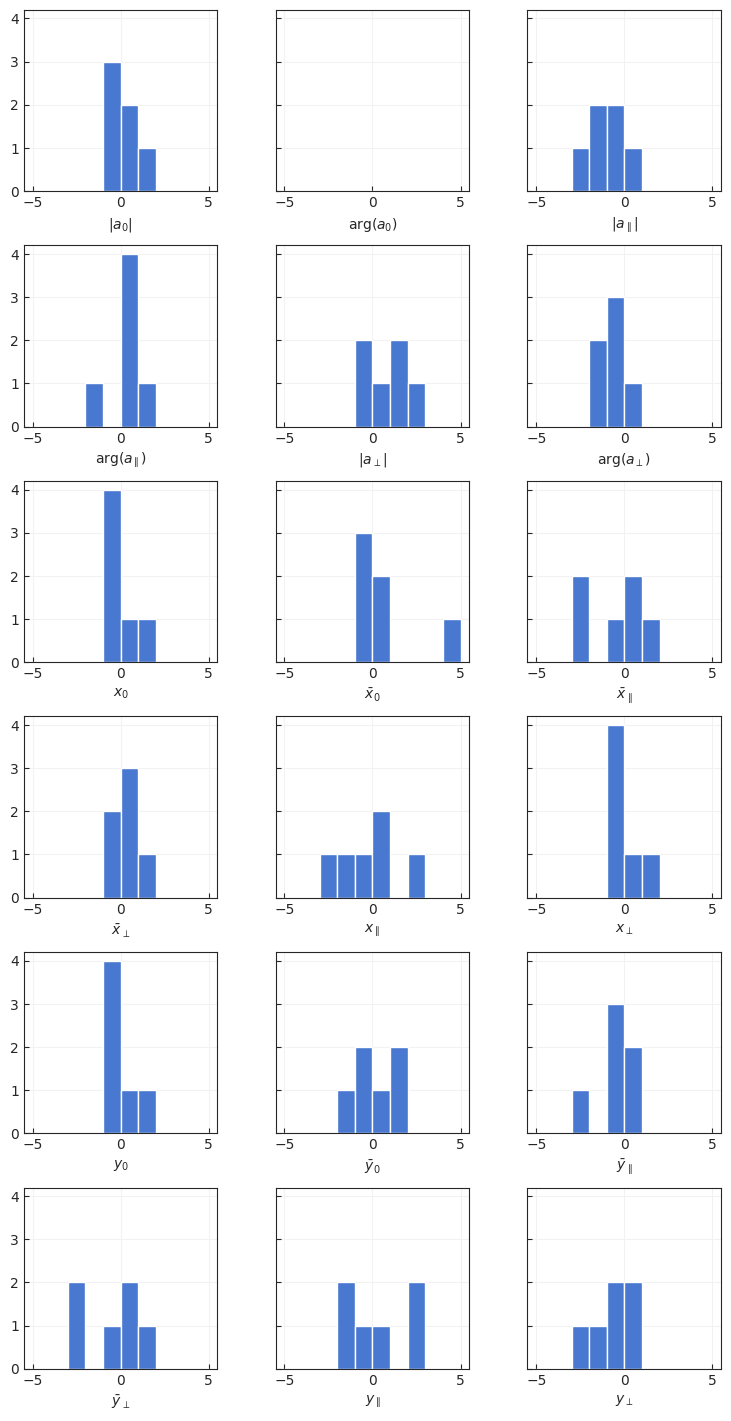

Plots for dir K3pi_td_CRSCF


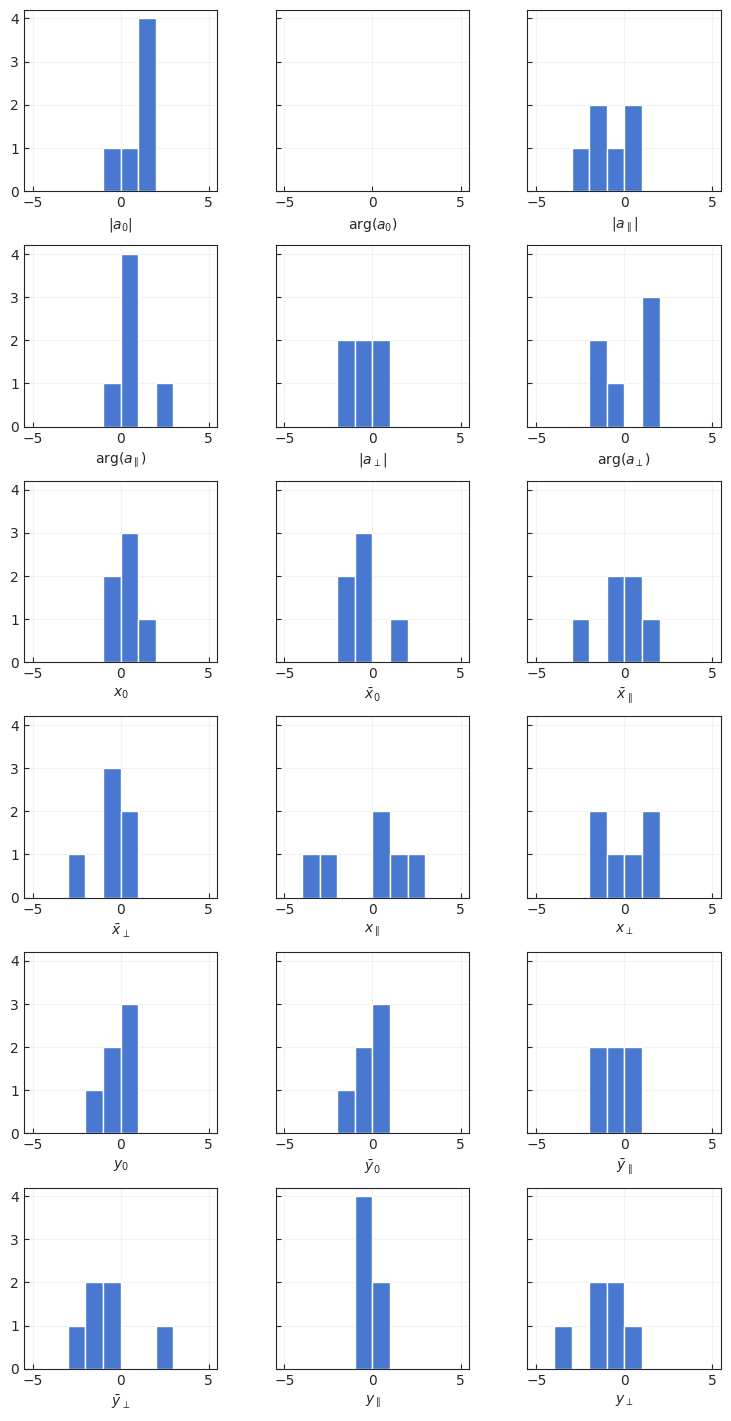

Plots for dir Kpi-Kpipi0-K3pi_td_CRSCF


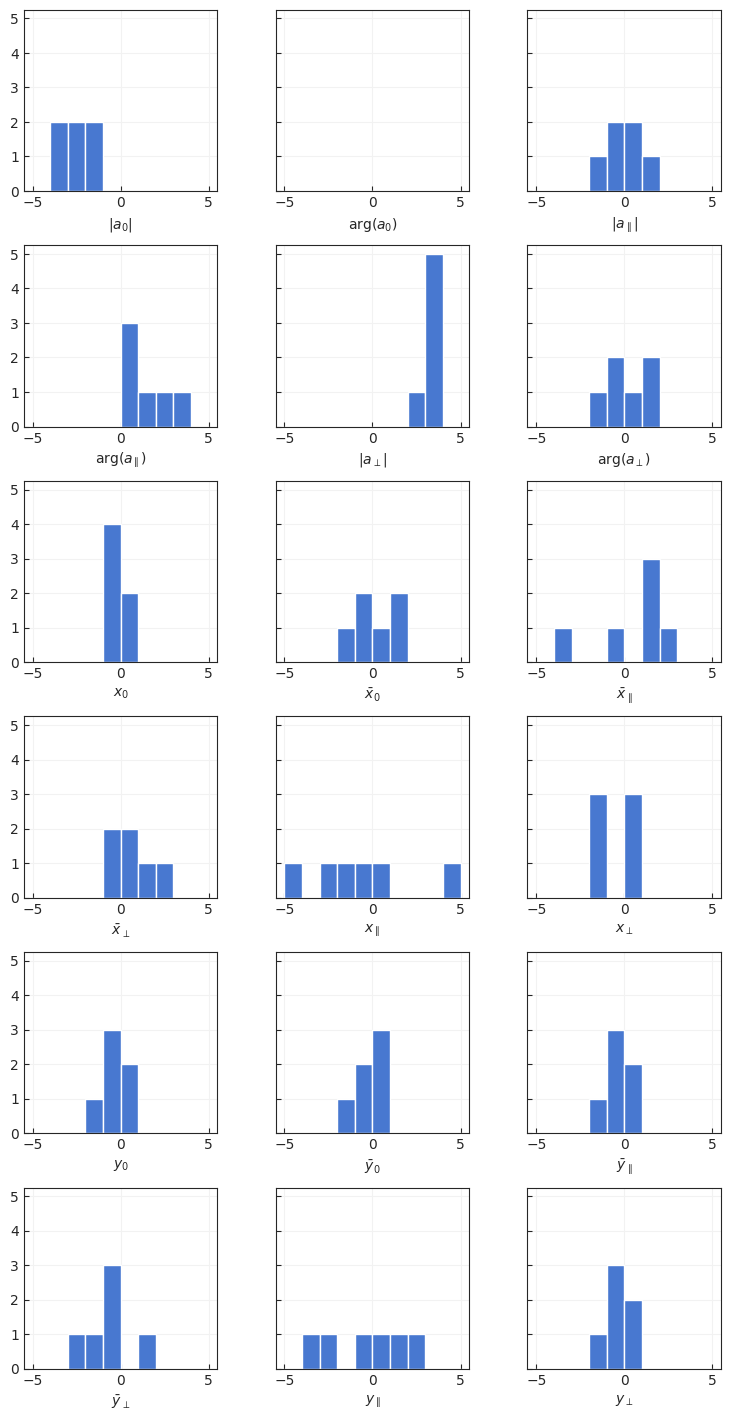

Plots for dir Kpi_td_all


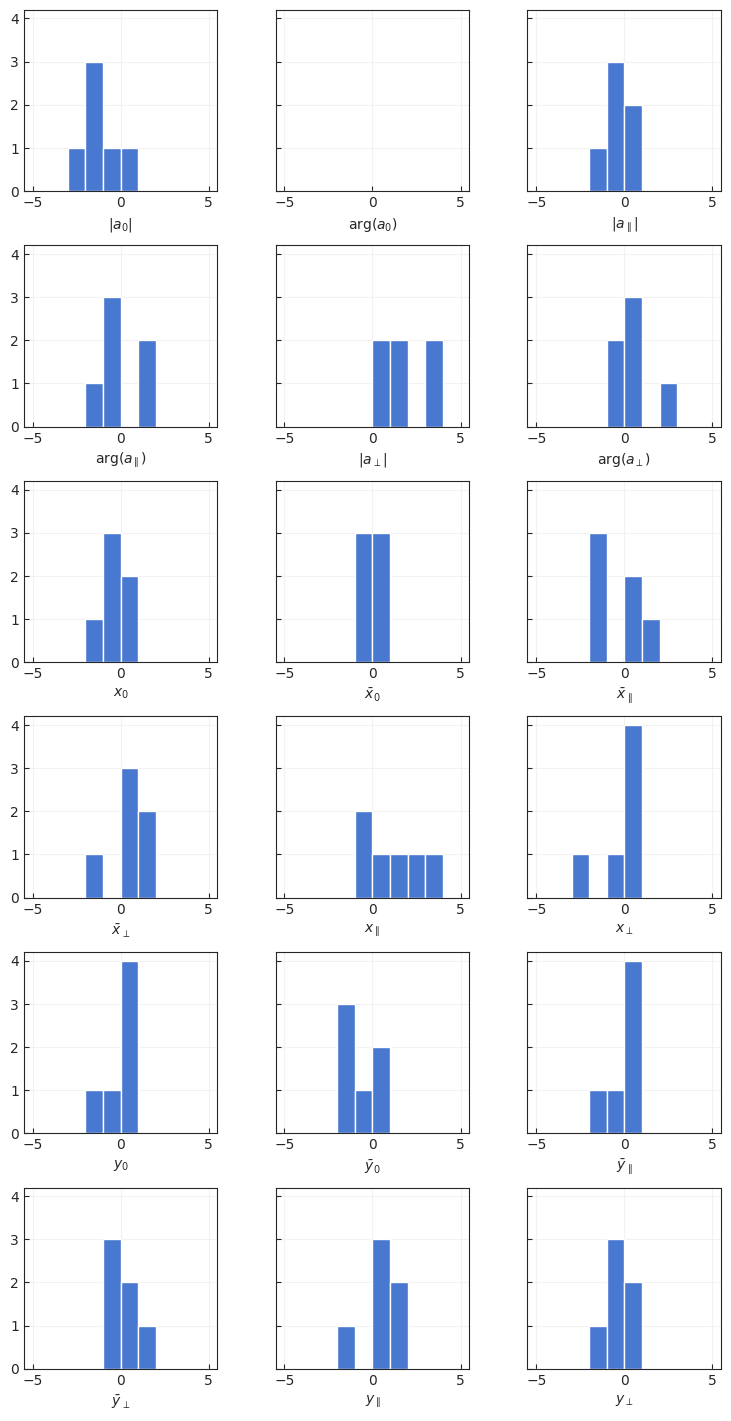

Plots for dir Kpipi0_td_all


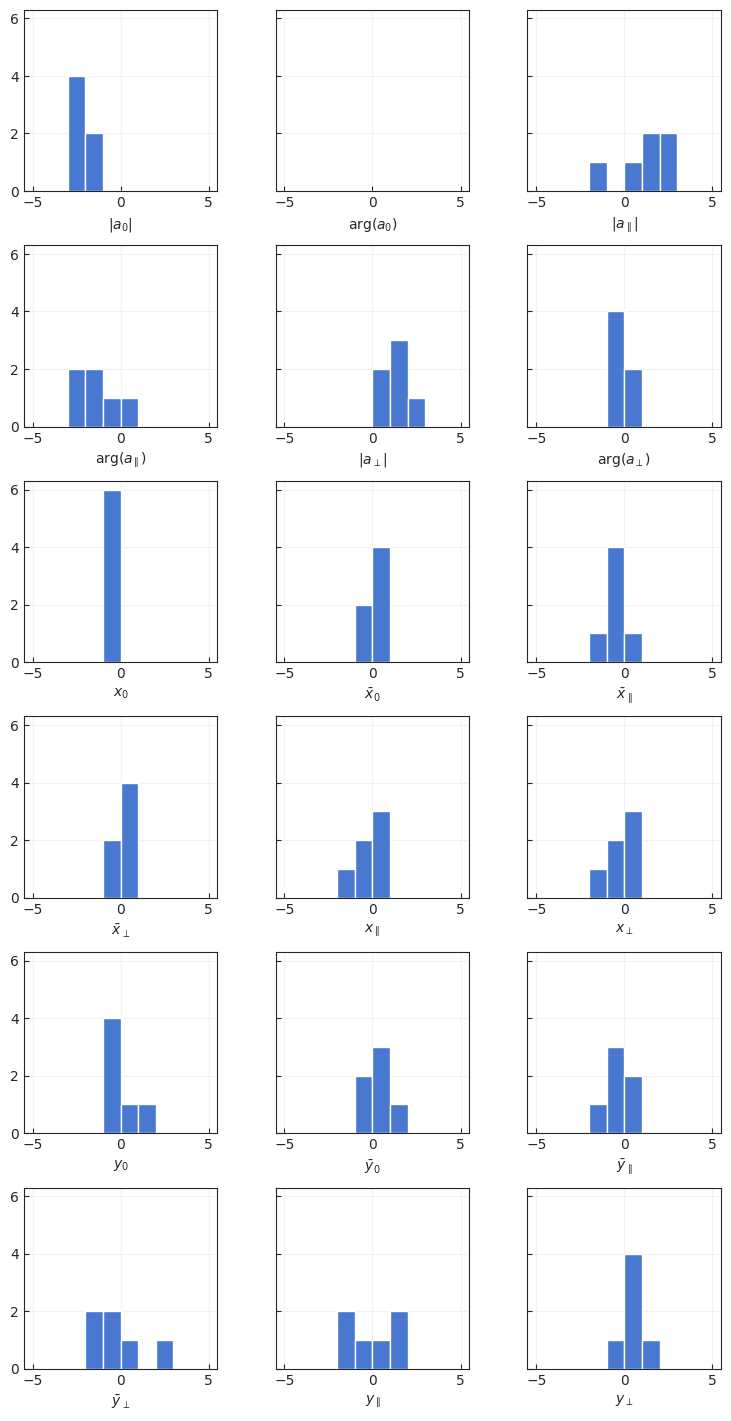

Plots for dir K3pi_td_all


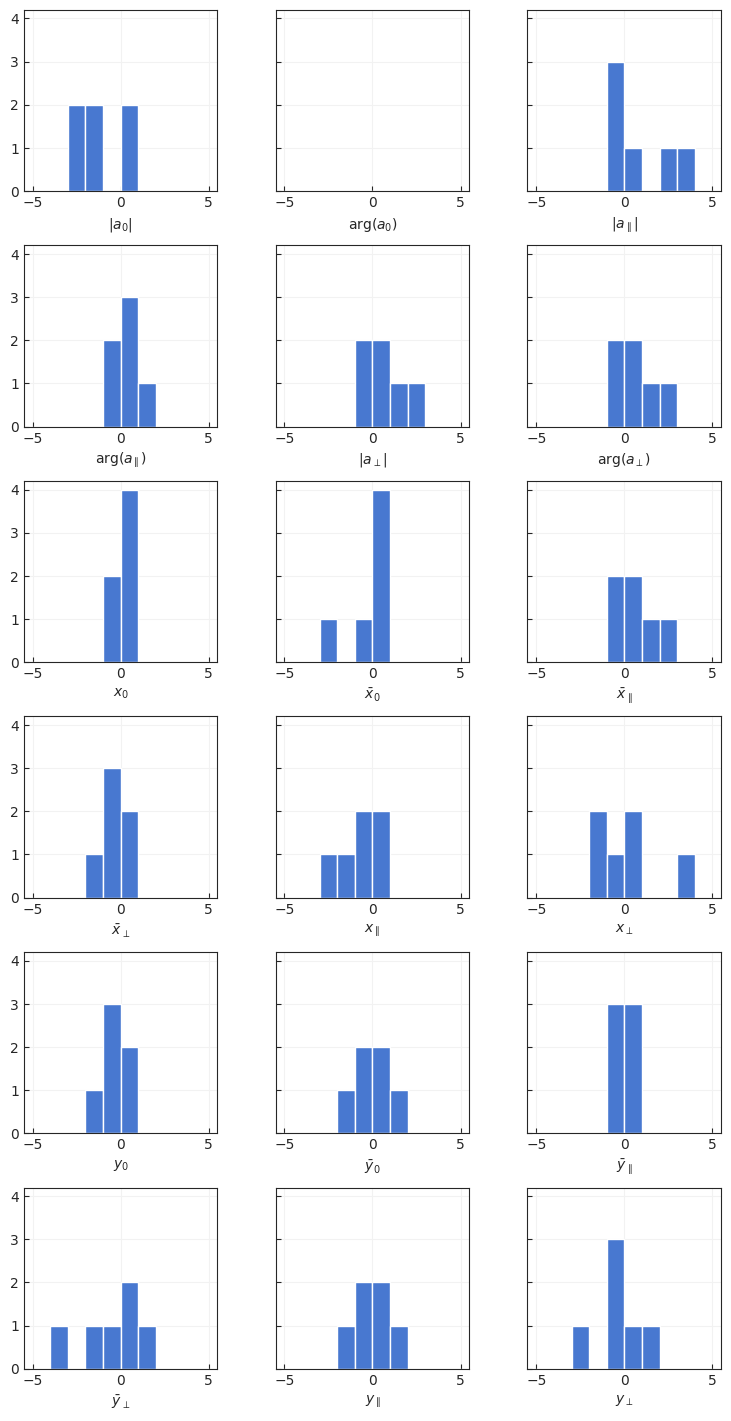

Plots for dir Kpi-Kpipi0-K3pi_td_all


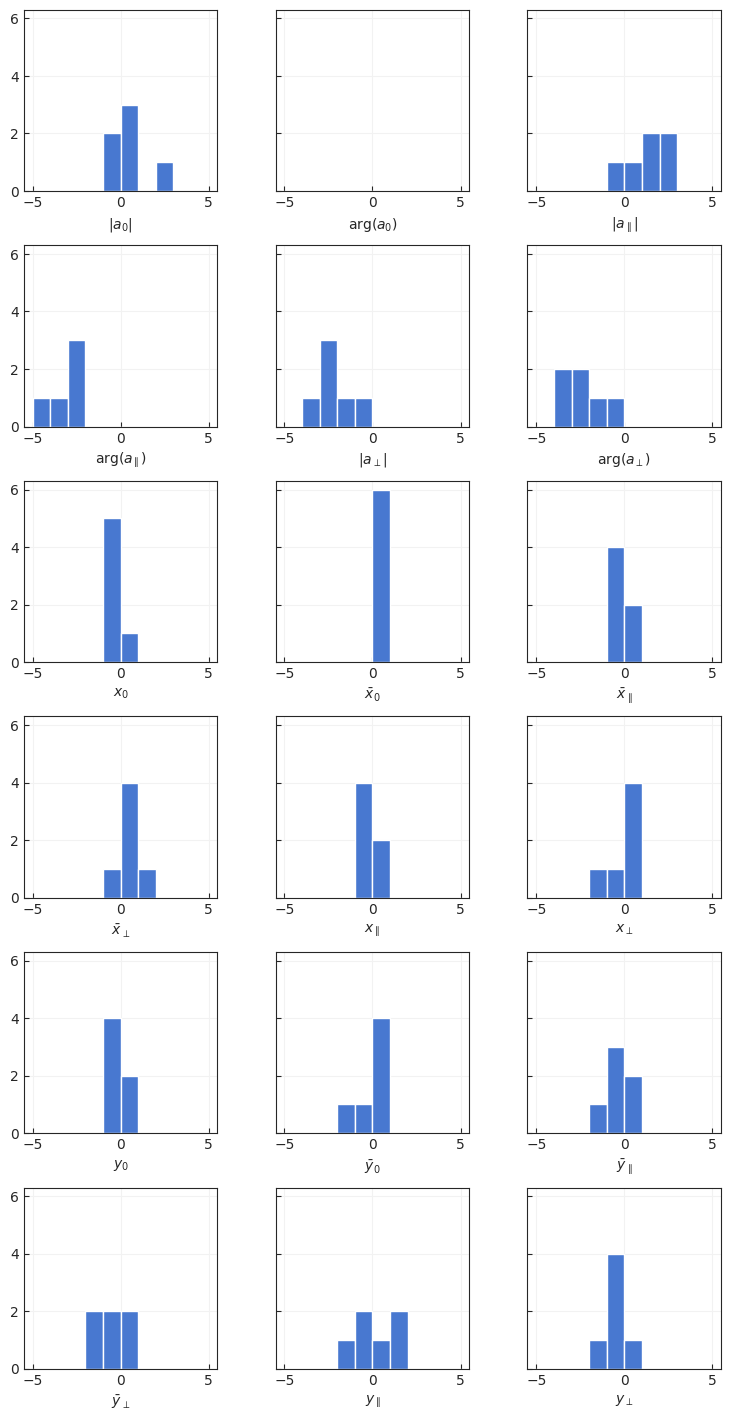

In [56]:
rows = 0
if time_dependent:
    rows = 6
else:
    rows = 2

plt.rcParams["figure.figsize"] = [9, rows * 3]
for i, dir in enumerate(dirs):
    axs = dfs_pulls[i].hist(column=list(var_names),
                            sharey=True, layout=(rows, 3), range=(-5, 5), bins=10)
    print("Plots for dir " + os.path.basename(dir))
    for ax in axs.flat:
        ax.set_xlabel(var_dict[ax.title.get_text()])
        ax.set_title("")
        
    plt.savefig(os.path.basename(dir) + "_pull_dist.pdf", bbox_inches = 'tight')
    plt.show()

In [57]:
class Gaussian(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        #if exog is None:
        #    exog = np.zeros_like(endog)
            
        super(Gaussian, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        loc = params[0]
        scale = params[1]

        return -np.log(norm.pdf(self.endog, loc=loc, scale=scale))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            loc_start = self.endog.mean()
            scale_start = self.endog.std()
            
            start_params = np.array([loc_start, scale_start])
            
        return super(Gaussian, self).fit(start_params=start_params,
                                         maxiter=maxiter, maxfun=maxfun, **kwds)

This fits the pull distributions with Gaussians and shows the uncertainties on the $\mu$ and $\sigma$ of each distribution. 

In [58]:
real_vars = list(var_names)
real_vars.remove('a0a')

for i, dir in enumerate(dirs):
    print("Results for dir " + dir)
    for var in real_vars:
        model = Gaussian(dfs_pulls[i][var]);
        results = model.fit(disp=False);
        print("{:4}: ({:+.2f} +- {:.2f}) +- ({:+.2f} +- {:.2f})".format(
            var, results.params[0], results.bse[0], results.params[1], results.bse[1]))
    print()

Results for dir ../results/Kpi_td_CR
ap  : (-0.68 +- 0.25) +- (+0.61 +- 0.18)
apa : (-0.53 +- 0.46) +- (+1.12 +- 0.32)
a0  : (+0.69 +- 0.27) +- (+0.66 +- 0.19)
at  : (-0.12 +- 0.44) +- (+1.07 +- 0.31)
ata : (-0.28 +- 0.55) +- (+1.35 +- 0.39)
xp  : (+0.07 +- 0.49) +- (+1.20 +- 0.35)
x0  : (+0.68 +- 0.59) +- (+1.44 +- 0.42)
xt  : (-0.08 +- 0.35) +- (+0.86 +- 0.25)
yp  : (+0.08 +- 0.36) +- (+0.87 +- 0.25)
y0  : (-0.22 +- 0.38) +- (+0.94 +- 0.27)
yt  : (+0.17 +- 0.11) +- (+0.28 +- 0.08)
xbp : (-0.33 +- 0.39) +- (+0.95 +- 0.27)
xb0 : (-1.45 +- 0.41) +- (+1.01 +- 0.29)
xbt : (-0.19 +- 0.46) +- (+1.12 +- 0.32)
ybp : (+0.26 +- 0.27) +- (+0.65 +- 0.19)
yb0 : (-0.93 +- 0.37) +- (+0.89 +- 0.26)
ybt : (+0.08 +- 0.38) +- (+0.94 +- 0.27)

Results for dir ../results/Kpipi0_td_CR
ap  : (-0.20 +- 0.24) +- (+0.58 +- 0.17)
apa : (-0.71 +- 0.38) +- (+0.94 +- 0.27)
a0  : (+0.43 +- 0.45) +- (+1.11 +- 0.32)
at  : (-0.35 +- 0.54) +- (+1.31 +- 0.38)
ata : (-0.92 +- 0.25) +- (+0.62 +- 0.18)
xp  : (-1.08 +- 0.59

ybp : (-0.32 +- 0.24) +- (+0.58 +- 0.17)
yb0 : (-0.12 +- 0.22) +- (+0.53 +- 0.15)
ybt : (-0.43 +- 0.25) +- (+0.61 +- 0.18)



We now calculate the relative errors $|\sigma/\mu|$ for each variable and dataset

In [65]:
# Calculate relative errors
dfs_relative_errors = []
for i in range(0, len(dirs)):
    df = dfs[i]
    df_relative_errors_dict = {var : abs(df[var + "_err"]/df[var + "_fit"]) for var in var_names}
    df_relative_errors = pd.DataFrame(df_relative_errors_dict)
    dfs_relative_errors.append(df_relative_errors)
#df_pulls = df_pulls.drop(list(var_names[0:6]), axis=1)

# Display relative errors in a table
for var in var_names:
    print("{:4}| ".format(var), end='')
    for i, dir in enumerate(dirs):
        print("{:6.2f} | ".format(dfs_relative_errors[i].mean()[var]), end='')
    print()

ap  |   0.02 |   0.02 |   0.02 |   0.01 |   0.02 |   0.02 |   0.02 |   0.01 |   0.02 |   0.02 |   0.02 |   0.01 | 
apa |   0.06 |   0.05 |   0.05 |   0.03 |   0.06 |   0.05 |   0.05 |   0.03 |   0.07 |   0.09 |   0.07 |   0.05 | 
a0  |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 |   0.00 | 
a0a |    nan |    nan |    nan |    nan |    nan |    nan |    nan |    nan |    nan |    nan |    nan |    nan | 
at  |   0.03 |   0.03 |   0.03 |   0.02 |   0.03 |   0.03 |   0.03 |   0.02 |   0.03 |   0.03 |   0.04 |   0.02 | 
ata |   0.01 |   0.01 |   0.01 |   0.00 |   0.01 |   0.01 |   0.01 |   0.00 |   0.01 |   0.01 |   0.01 |   0.01 | 
xp  |   1.26 |   6.21 |   1.10 |   0.95 |   2.95 |  10.31 |   1.03 |   3.36 |   1.51 |   2.93 |   1.40 |   4.38 | 
x0  |   0.84 |   1.18 |   9.66 |   0.50 |   2.76 |   4.69 |  15.08 |  46.46 |  29.35 |  51.41 |   6.90 |   8.68 | 
xt  |   2.54 |   1.68 |   2.26 |   1.24 |  17.40 |  10.01 |   0.87 |   1.60 |   

This might be useful if we want to plot the fitted Gaussian on top of the histograms.

tau = -0.533 +- 1.120 ps


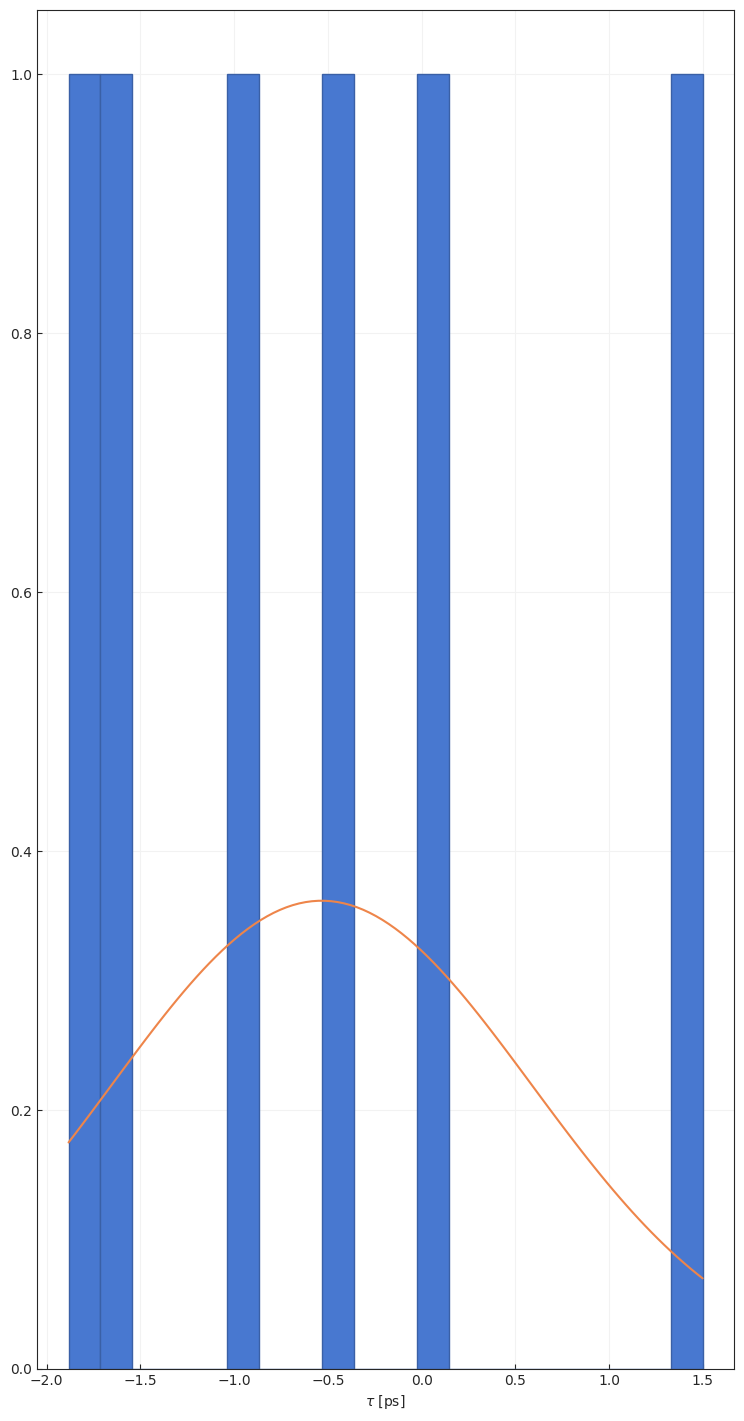

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("$\\tau$ [ps]")
#ax.set_xlim(1.5, 1.57)

data = dfs_pulls[0].apa

# Create histogram and calculate area under it for
# renormalization of fitted PDF
n, bins, patches = plt.hist(data, bins=20, edgecolor=darken_color(sns.color_palette("muted")[0], 0.8))
area = np.sum(np.diff(bins)*n)

mu, sigma = norm.fit(data)

# Create a bunch of equidistant points to calculate the 
# function values at (many points to make it look smooth)
x = np.linspace(data.min(), data.max(), 100)
norm_fitted = norm.pdf(x, mu, sigma)*area
plt.plot(x, norm_fitted)
print("tau = {:.3f} +- {:.3f} ps".format(mu, sigma))